## <b> <span style='color:#e61227'>|</span> Traffic Signs Detection Using YOLOv10 </b>

## <b>1 <span style='color:#e61227'>|</span> Introduction</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> Object Detection </b></p>
</div>

**Computer vision** is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information. One popular and powerful technique used in computer vision for object detection is called **YOLO**, which stands for "You Only Look Once".

YOLO aims to identify and locate objects in an image or video stream in real-time. Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.

This algorithm divides the input image into a grid and predicts bounding boxes and class probabilities for objects within each grid cell. It simultaneously predicts the class labels and their corresponding bounding boxes, making it incredibly efficient and fast. YOLO is known for its real-time performance, enabling it to process images and videos at impressive speeds.

By leveraging **deep convolutional neural networks**, YOLO can learn to recognize a wide range of objects and accurately localize them within an image. It can detect multiple objects of different classes simultaneously, making it particularly useful for applications where **real-time processing** and high detection accuracy are crucial, such as **autonomous driving**, **video surveillance**, and **robotics**.


## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b>


get data from kaggle

In [ ]:
!kaggle datasets download -d pkdarabi/cardetection

In [ ]:
!unzip cardetection.zip

In [ ]:
!pip install ultralytics

In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#e61227'>|</span> Dataset</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

***3.1.1. Show Some Images From TrainSet***

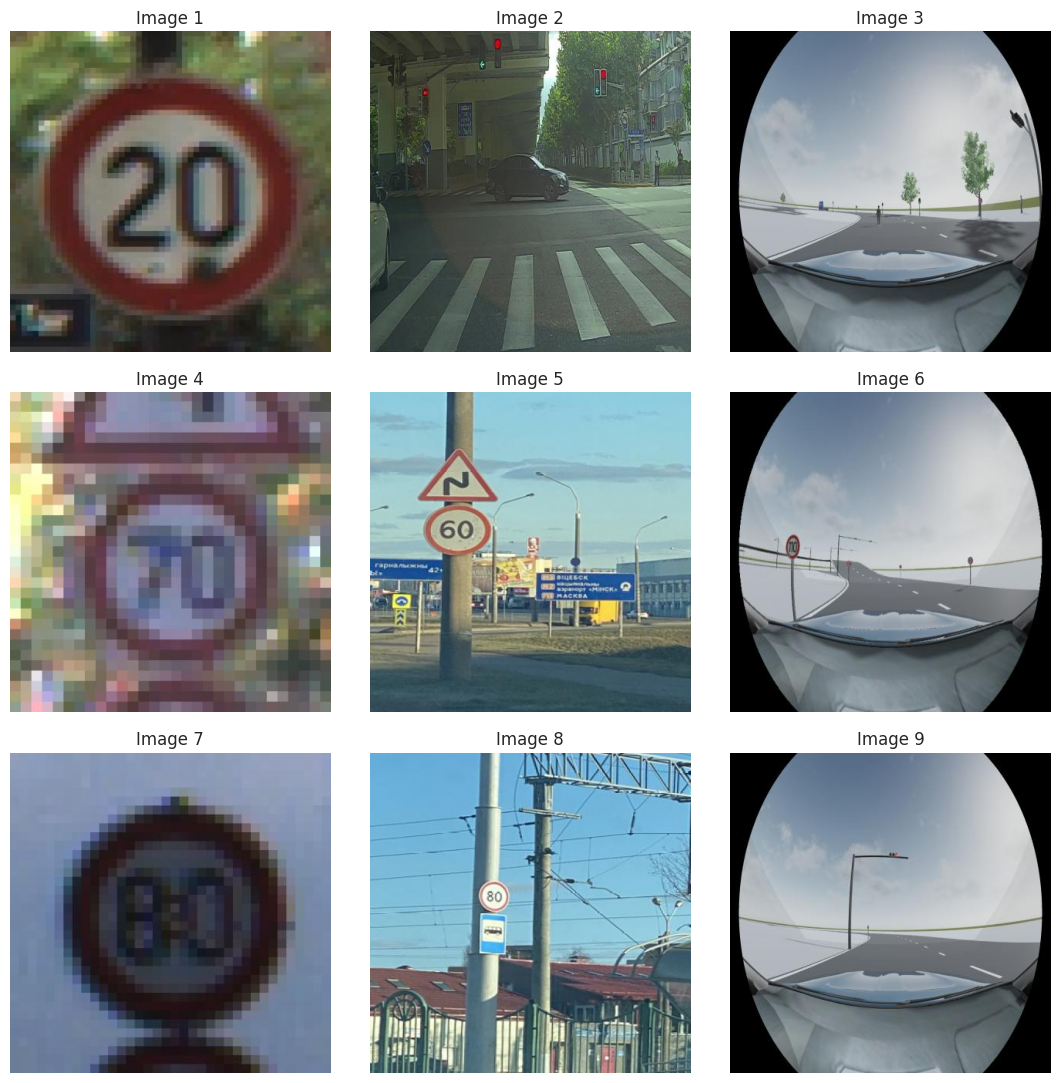

In [ ]:
Image_dir = '/content/car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [ ]:
# Get the size of the image
image = cv2.imread("/content/car/train/images/000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


## <b>4 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv10 For Detect Traffic Signs  </b>

100%|██████████| 5.59M/5.59M [00:00<00:00, 63.3MB/s]



image 1/1 /content/car/train/images/00007_00002_00025_png.rf.a7c04dd6198b532781055b3dc5e8cc8b.jpg: 640x640 (no detections), 40.8ms
Speed: 24.0ms preprocess, 40.8ms inference, 115.7ms postprocess per image at shape (1, 3, 640, 640)


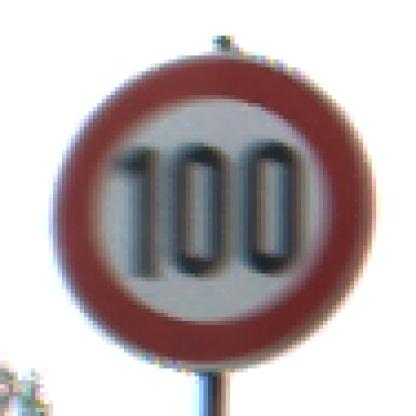

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov10n.pt")

# Use the model to detect object
image = "/content/car/train/images/00007_00002_00025_png.rf.a7c04dd6198b532781055b3dc5e8cc8b.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

## <b>5 <span style='color:#e61227'>|</span> YOLOv10-Based Traffic Signs Detection Model</b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.1 |</span></b> Model Training Using Customized Dataset Of Traffic Signs </b></p>
</div>
        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv10 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***35***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv10 model was assessed based on various metrics, including Mean Average Precision (mAP).


***5.1.1. Training Step***

In [ ]:
!pip install --upgrade ultralytics ray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 9.5 MB/s eta 0:00:00


In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov10n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/car/data.yaml",epochs = 35, batch = -1, optimizer = 'auto')


Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/car/data.yaml, epochs=35, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 67.3MB/s]


WARNING ⚠️ NMS time limit 2.050s exceeded
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.23G reserved, 0.07G allocated, 14.45G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     2712890       8.423         0.455         40.57           nan        (1, 3, 640, 640)                    list
     2712890       16.85         0.673         32.24           nan        (2, 3, 640, 640)                    list
     2712890       33.69         1.298         35.62           nan        (4, 3, 640, 640)                    list
     2712890       67.38         2.603         39.18           nan        (8, 3, 640, 640)                    list
     2712890       134.8         4.987          57.9           nan       (16, 3, 640, 640)                    list
AutoBatch: Using batch-size 27 for CUDA:0 8.67G/14.75G (59%) ✅


train: Scanning /content/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:02<00:00, 1283.50it/s]

train: New cache created: /content/car/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 583.84it/s]


val: New cache created: /content/car/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.000421875), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 35 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/35      5.79G       1.75      10.93      2.297         54        640: 100%|██████████| 131/131 [01:38<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.36it/s]


                   all        801        944      0.396     0.0806      0.117     0.0976

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/35      5.29G      1.627      8.333      2.185         39        640: 100%|██████████| 131/131 [01:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.38it/s]


                   all        801        944      0.257      0.346      0.211      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/35      5.27G       1.66      6.734      2.169         41        640: 100%|██████████| 131/131 [01:18<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        801        944      0.271      0.338      0.226      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/35      5.28G      1.667      5.266      2.174         42        640: 100%|██████████| 131/131 [01:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]

                   all        801        944      0.467      0.467      0.451      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/35      5.25G      1.591      4.131      2.134         41        640: 100%|██████████| 131/131 [01:20<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all        801        944      0.395      0.399      0.358      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/35      5.28G      1.566      3.459      2.114         37        640: 100%|██████████| 131/131 [01:20<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]

                   all        801        944      0.578      0.624      0.657      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/35      5.27G      1.528      3.033      2.074         46        640: 100%|██████████| 131/131 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        801        944      0.699      0.619      0.693      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/35      5.28G      1.492      2.786      2.055         47        640: 100%|██████████| 131/131 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.76it/s]

                   all        801        944      0.704      0.645      0.715      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/35      5.25G      1.499      2.616      2.064         48        640: 100%|██████████| 131/131 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.75it/s]

                   all        801        944      0.728      0.693      0.759      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/35      5.27G      1.458      2.413      2.037         46        640: 100%|██████████| 131/131 [01:22<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.95it/s]

                   all        801        944      0.763      0.702      0.778      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/35      5.27G      1.428       2.25      2.026         46        640: 100%|██████████| 131/131 [01:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                   all        801        944      0.781      0.722      0.791      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/35      5.28G       1.42      2.154      2.012         45        640: 100%|██████████| 131/131 [01:23<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

                   all        801        944      0.781      0.716      0.813      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/35      5.25G      1.386      2.079      2.006         46        640: 100%|██████████| 131/131 [01:24<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]

                   all        801        944       0.85      0.726      0.831      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/35      5.26G      1.366      1.999      2.007         42        640: 100%|██████████| 131/131 [01:21<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]

                   all        801        944      0.809      0.687      0.792      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/35      5.25G      1.377      1.905      1.993         46        640: 100%|██████████| 131/131 [01:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.01it/s]

                   all        801        944      0.865       0.74      0.842      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/35      5.28G      1.365      1.863      1.986         44        640: 100%|██████████| 131/131 [01:23<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.06it/s]

                   all        801        944      0.871       0.76       0.85      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/35      5.25G      1.352      1.814       1.96         38        640: 100%|██████████| 131/131 [01:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]

                   all        801        944      0.837       0.73      0.837      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/35      5.28G      1.302       1.75      1.971         42        640: 100%|██████████| 131/131 [01:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]

                   all        801        944      0.891      0.766      0.867      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/35      5.25G      1.322       1.73       1.97         44        640: 100%|██████████| 131/131 [01:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.96it/s]

                   all        801        944      0.872      0.779      0.867      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/35      5.26G      1.297      1.677      1.955         47        640: 100%|██████████| 131/131 [01:23<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]

                   all        801        944      0.872      0.785      0.879      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/35      5.26G      1.306      1.676      1.958         38        640: 100%|██████████| 131/131 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]

                   all        801        944      0.884      0.787      0.884      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/35      5.26G      1.284      1.633      1.956         41        640: 100%|██████████| 131/131 [01:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.87it/s]

                   all        801        944       0.91      0.797      0.894      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/35      5.27G      1.272      1.585      1.944         50        640: 100%|██████████| 131/131 [01:21<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.60it/s]

                   all        801        944      0.887      0.821      0.901      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/35      5.28G      1.271      1.548      1.942         55        640: 100%|██████████| 131/131 [01:22<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.51it/s]

                   all        801        944        0.9      0.817      0.901      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/35      5.25G      1.244      1.479      1.925         34        640: 100%|██████████| 131/131 [01:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:11<00:00,  1.35it/s]

                   all        801        944      0.906        0.8      0.905      0.782


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/35      5.29G      1.256      1.121      1.876         24        640: 100%|██████████| 131/131 [01:19<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.46it/s]

                   all        801        944       0.89      0.829      0.912      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/35      5.27G      1.254       1.06       1.86         25        640: 100%|██████████| 131/131 [01:15<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.62it/s]

                   all        801        944      0.879      0.825      0.906      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/35      5.28G      1.227      1.022      1.839         26        640: 100%|██████████| 131/131 [01:16<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.16it/s]

                   all        801        944      0.893      0.839      0.917      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/35      5.27G        1.2     0.9819      1.838         27        640: 100%|██████████| 131/131 [01:17<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.50it/s]

                   all        801        944      0.887      0.856      0.921      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/35      5.28G      1.205     0.9548      1.832         28        640: 100%|██████████| 131/131 [01:15<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.48it/s]

                   all        801        944      0.909      0.823       0.92        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/35      5.27G      1.181     0.9472      1.827         26        640: 100%|██████████| 131/131 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.58it/s]

                   all        801        944      0.912      0.845      0.923      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/35      5.28G      1.171     0.9118      1.821         27        640: 100%|██████████| 131/131 [01:17<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.07it/s]

                   all        801        944       0.88      0.859      0.924       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/35      5.27G       1.16     0.8763      1.804         32        640: 100%|██████████| 131/131 [01:18<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:08<00:00,  1.77it/s]

                   all        801        944      0.903       0.86       0.93      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/35      5.28G       1.14     0.8678      1.807         24        640: 100%|██████████| 131/131 [01:17<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.49it/s]

                   all        801        944      0.897      0.858       0.93      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/35      5.27G      1.126     0.8529      1.792         24        640: 100%|██████████| 131/131 [01:16<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:09<00:00,  1.66it/s]

                   all        801        944      0.889      0.857       0.93      0.815



35 epochs completed in 0.906 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,700,266 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:10<00:00,  1.39it/s]


                   all        801        944      0.888      0.857       0.93      0.814
           Green Light         87        122      0.787      0.639      0.759      0.459
             Red Light         74        108      0.782      0.663      0.771       0.46
       Speed Limit 100         52         52      0.918      0.856      0.968      0.885
       Speed Limit 110         17         17      0.696      0.944      0.928      0.865
       Speed Limit 120         60         60      0.946      0.917      0.971      0.898
        Speed Limit 20         56         56      0.956      0.929      0.981      0.868
        Speed Limit 30         71         74      0.986      0.946      0.981      0.917
        Speed Limit 40         53         55      0.865      0.891      0.963      0.863
        Speed Limit 50         68         71      0.892      0.859       0.95      0.862
        Speed Limit 60         76         76      0.876      0.882       0.94      0.877
        Speed Limit 7

***5.1.2. Validation Step***

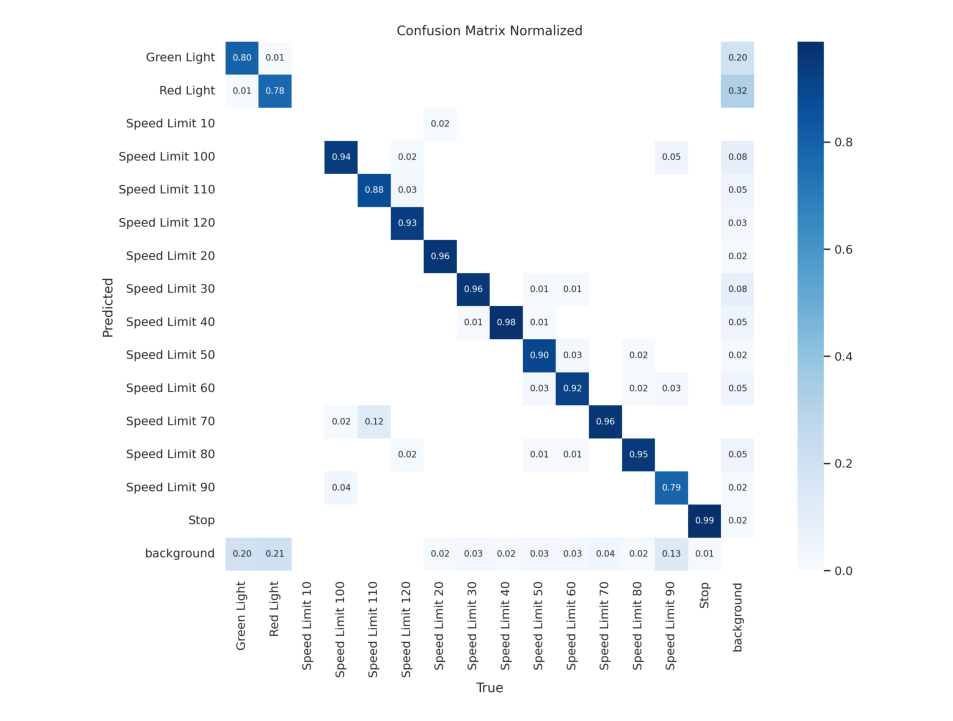

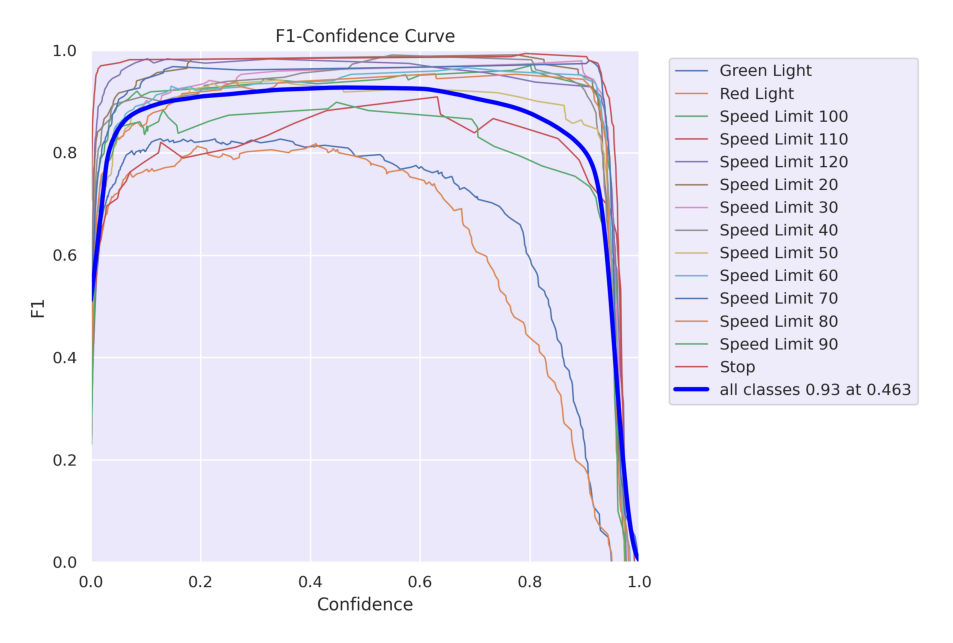

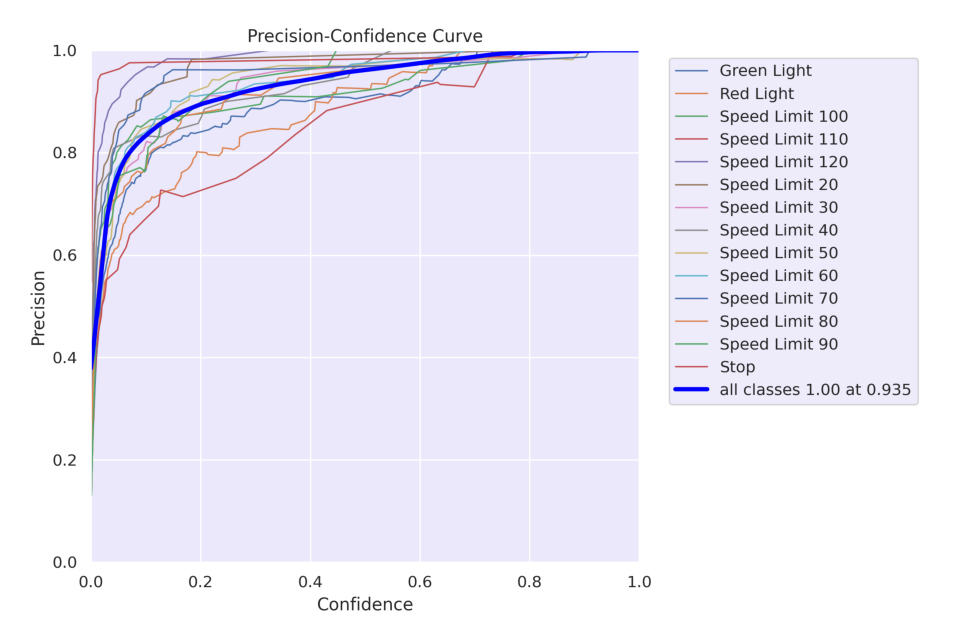

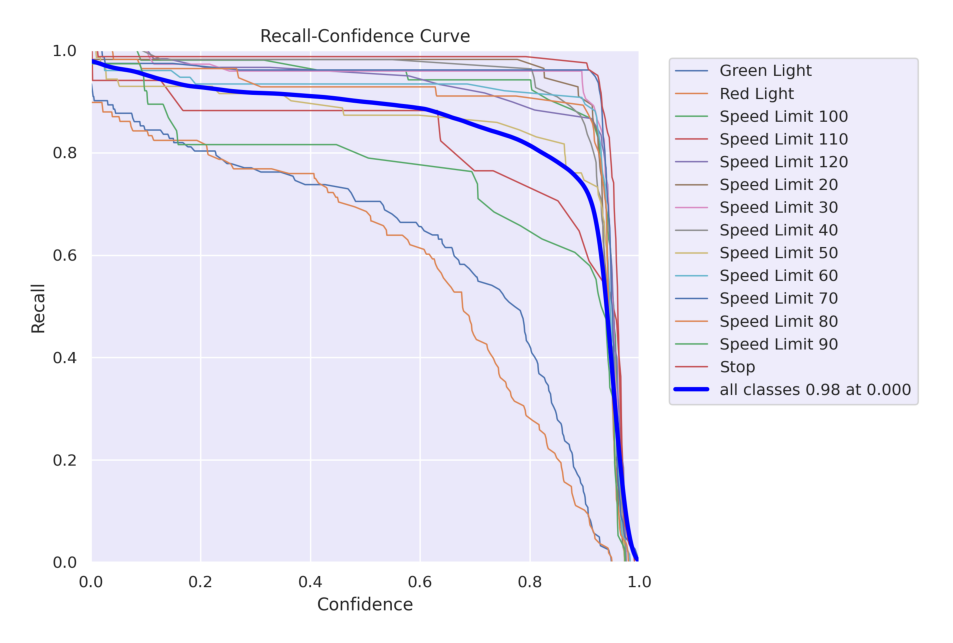

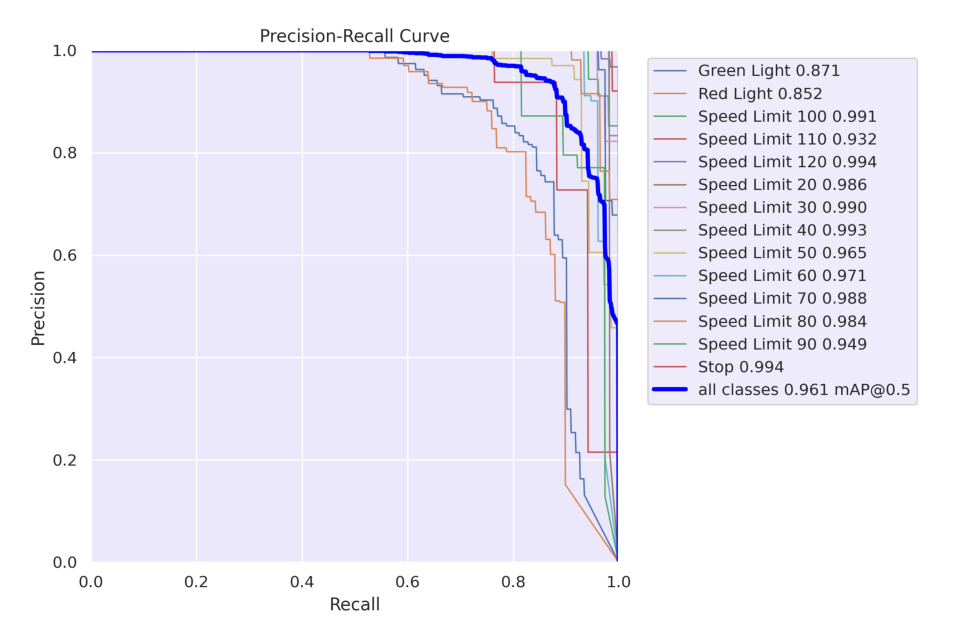

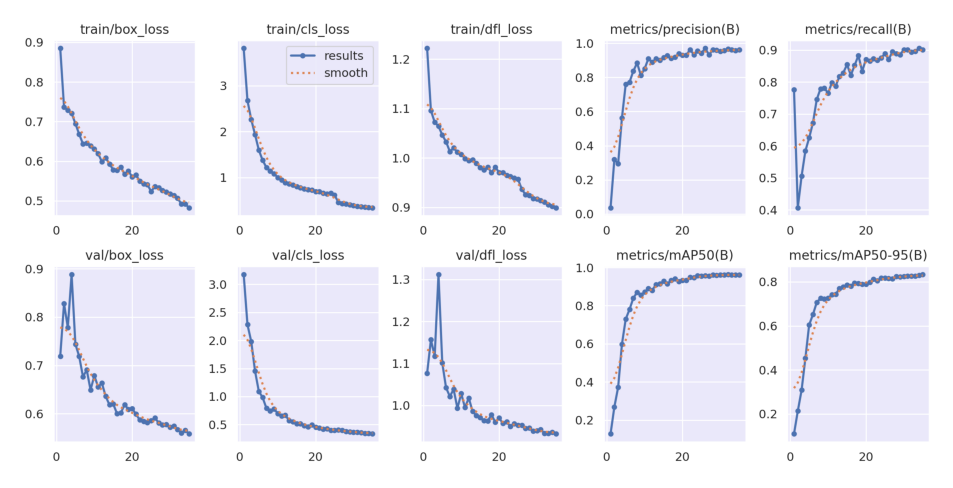

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = '/content/runs/detect/train'

# Display the images
display_images(post_training_files_path, image_files)


In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
25                       26                   1.2555                  1.12130   
26                       27                   1.2539                  1.05990   
27                       28                   1.2266                  1.02240   
28                       29                   1.2005                  0.98191   
29                       30                   1.2051                  0.95481   
30                       31                   1.1808                  0.94719   
31                       32                   1.1708                  0.91178   
32                       33                   1.1601                  0.87628   
33                       34                   1.1405                  0.86781   
34                       35                   1.1255                  0.85291   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
25                   1.8764                  0.88999                  0.82886   
26                   1.8601                  0.87911                  0.82519   
27                   1.8389                  0.89326                  0.83948   
28                   1.8377                  0.88739                  0.85629   
29                   1.8323                  0.90946                  0.82296   
30                   1.8269                  0.91214                  0.84491   
31                   1.8209                  0.87977                  0.85939   
32                   1.8039                  0.90302                  0.86044   
33                   1.8067                  0.89689                  0.85790   
34                   1.7920                  0.88852                  0.85688   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
25                  0.91187                  0.78743                   1.2599   
26                  0.90592                  0.78432                   1.2480   
27                  0.91661                  0.79287                   1.2380   
28                  0.92116                  0.80454                   1.2151   
29                  0.91969                  0.79966                   1.2323   
30                  0.92349                  0.80207                   1.2290   
31                  0.92444                  0.80972                   1.2055   
32                  0.92972                  0.81119                   1.2103   
33                  0.92970                  0.81258                   1.1984   
34                  0.93021                  0.81455                   1.1934   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
25                  0.87825                   1.8980                 0.000154   
26                  0.88467                   1.9033                 0.000139   
27                  0.85314                   1.9064                 0.000124   
28                  0.82348                   1.8864                 0.000109   
29                  0.82249                   1.8957                 0.000095   
30                  0.81183                   1.8762                 0.000080   
31                  0.79419                   1.8776                 0.000065   
32                  0.77352                   1.8769                 0.000050   
33                  0.76204                   1.8705                 0.000035   
34                  0.76530                   1.8698                 0.000020   

                     lr/pg1                   lr/pg2  
25                 0.000154                 0.000154  
26                 0.000139                 0.000139  
27                 0.000124                 0.000124  
28                 0.000109                 0.000109  
29                 0.000095                 0.000095  
30                 0.000080                 0.000080  
31                 0.000065                 0.000065  
32            

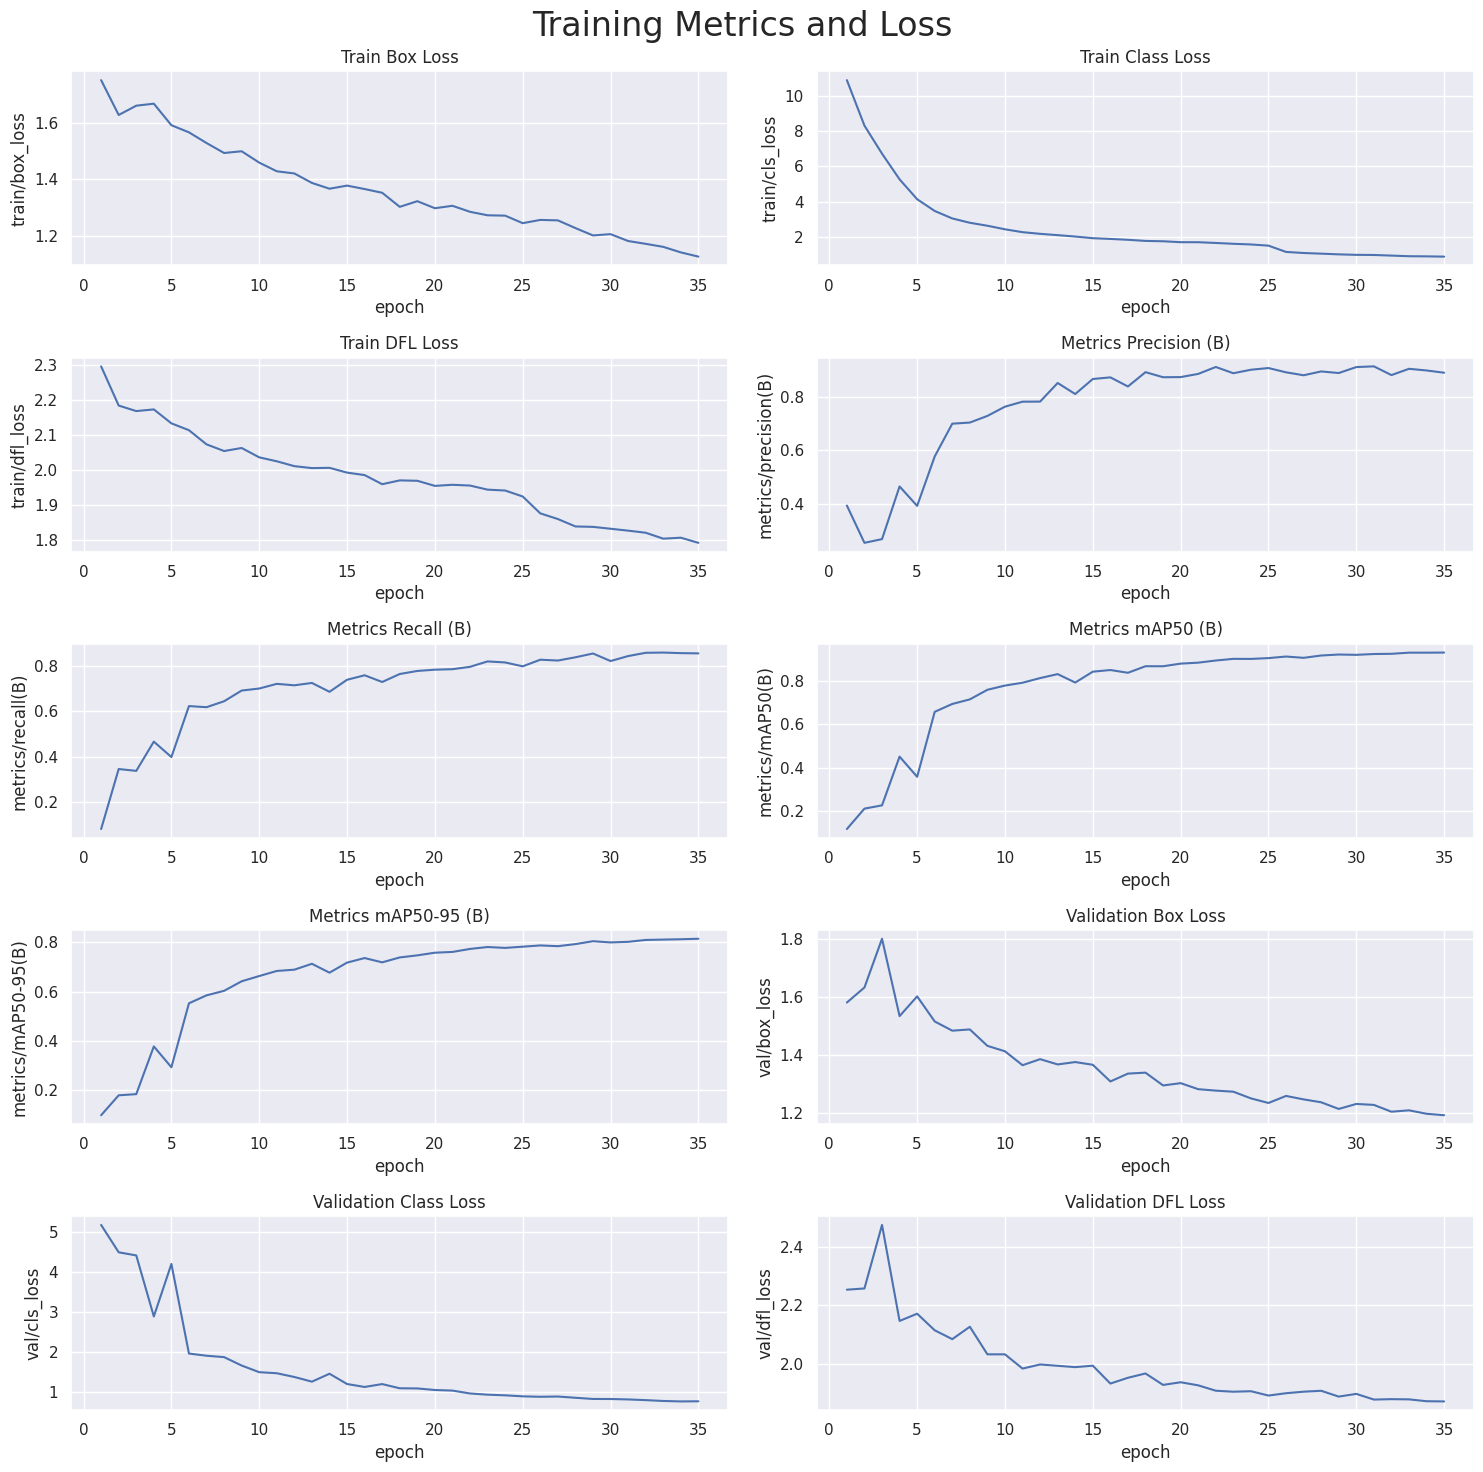

In [ ]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.2 |</span></b> Validation of the Model By TestSet </b></p>
</div>

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,700,266 parameters, 0 gradients, 8.3 GFLOPs


val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:13<00:00,  3.90it/s]


                   all        801        944      0.888      0.857       0.93      0.814
           Green Light         87        122      0.788      0.641      0.762      0.463
             Red Light         74        108      0.783      0.667      0.771       0.46
       Speed Limit 100         52         52      0.918      0.857      0.968      0.885
       Speed Limit 110         17         17      0.696      0.944      0.928      0.863
       Speed Limit 120         60         60      0.946      0.917      0.971      0.897
        Speed Limit 20         56         56      0.956      0.929      0.981      0.866
        Speed Limit 30         71         74      0.986      0.946      0.981      0.918
        Speed Limit 40         53         55      0.865      0.891      0.963      0.862
        Speed Limit 50         68         71      0.892      0.859       0.95      0.864
        Speed Limit 60         76         76      0.876      0.882      0.939      0.872
        Speed Limit 7

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.3 |</span></b> Making Predictions On Test Images </b></p>
</div>


0: 640x640 (no detections), 39.3ms
Speed: 5.3ms preprocess, 39.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 37.5ms
Speed: 2.6ms preprocess, 37.5ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 30, 31.4ms
Speed: 4.6ms preprocess, 31.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 15.4ms
Speed: 2.8ms preprocess, 15.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 70, 15.5ms
Speed: 2.7ms preprocess, 15.5ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 60, 16.8ms
Speed: 3.1ms preprocess, 16.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 50, 18.3ms
Speed: 2.5ms preprocess, 18.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 100, 16.5ms
Speed: 2.5ms preprocess,

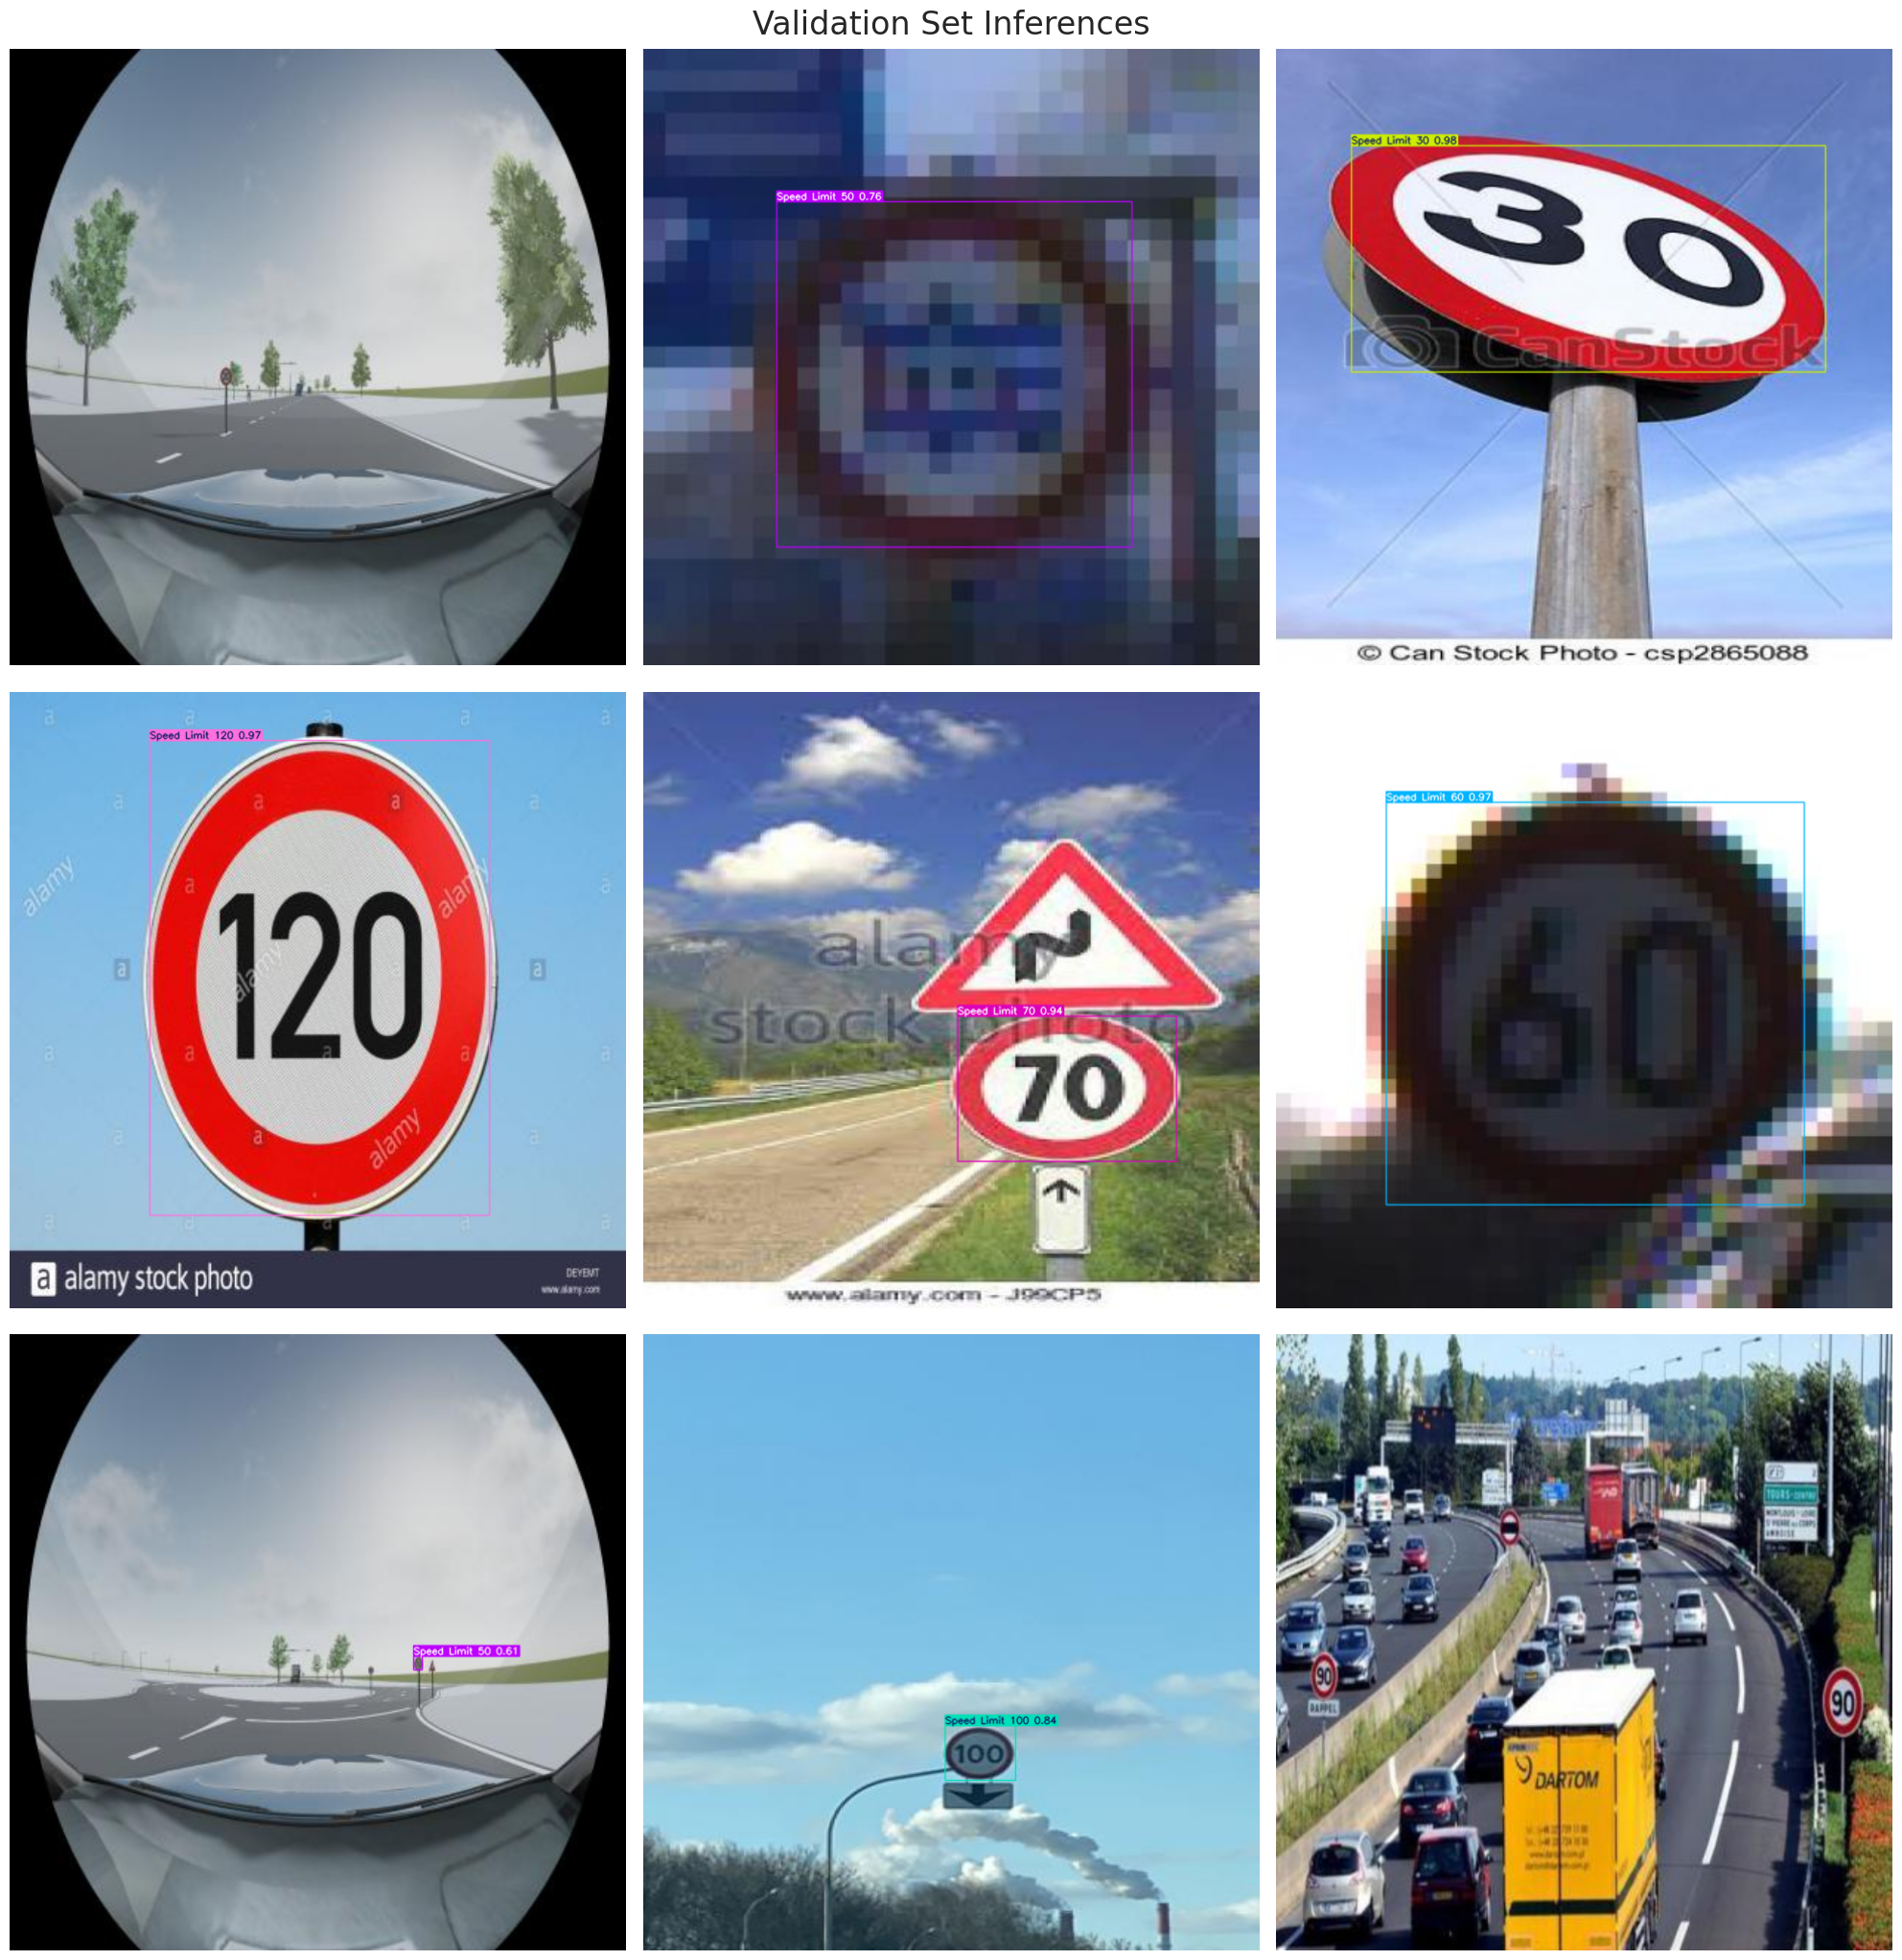

In [ ]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/content/car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])

            # Load image
            image = cv2.imread(image_path)

            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)

                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)

                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)

                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()


## <b>7 <span style='color:#e61227'>|</span> Save Model  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> </b></p>
</div>


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Thank you for taking the time to review my notebook! If you have any questions or criticisms, please kindly let me know in the comments section !!!!  </b></p>
</div>


In [ ]:
Valid_model.export(format="onnx")

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CPU (Intel Xeon 2.30GHz)

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 227.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.6s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.2 opset 17...
ONNX: export success ✅ 9.1s, saved as '/content/runs/detect/train/weights/best.onnx' (8.9 MB)

Export complete (11.3s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/runs/detect/train/weights/best.onnx imgsz=640 data=/conte

'/content/runs/detect/train/weights/best.onnx'

In [ ]:
from google.colab import files

files.download('/content/runs/detect/train/weights/best.onnx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>